# Pyber Analysis

* In general, most drivers are in urban areas.

* There are also more rides occured in urban areas. Although 77.8% of total drivers only yield 68.4% of total rides. This means residents of the urban areas enjoy more ride share resources.

* The fares in urban areas are the lowest. The fares in rural areas are not necessarily higher, but they fluctuate immensely.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

city_df = pd.read_csv("raw_data/city_data.csv")
ride_df = pd.read_csv("raw_data/ride_data.csv")

In [2]:
# There are 2 entries of the same city.
city_df["city"].value_counts().head()

Port James     2
Stewartview    1
West Peter     1
Jasonfort      1
Carrollbury    1
Name: city, dtype: int64

In [3]:
city_df[city_df["city"] == "Port James"]

,city,driver_count,type
84,Port James,15,Suburban
100,Port James,3,Suburban


In [4]:
# Combine the 2 entries into 1.
city_df.iloc[84,1] = city_df.iloc[84,1] + city_df.iloc[100,1]
city_df = city_df.drop(100)
city_df[city_df["city"] == "Port James"]

,city,driver_count,type
84,Port James,18,Suburban


In [5]:
df = pd.merge(city_df, ride_df, on="city")
df.head()

,city,driver_count,type,date,fare,ride_id
0,Kelseyland,63,Urban,2016-08-19 04:27:52,5.51,6246006544795
1,Kelseyland,63,Urban,2016-04-17 06:59:50,5.54,7466473222333
2,Kelseyland,63,Urban,2016-05-04 15:06:07,30.54,2140501382736
3,Kelseyland,63,Urban,2016-01-25 20:44:56,12.08,1896987891309
4,Kelseyland,63,Urban,2016-08-09 18:19:47,17.91,8784212854829


## Bubble Plot of Ride Sharing Data

In [6]:
groups = df.groupby(["type", "city"])

n_rides = groups["ride_id"].count()
n_rides1 = n_rides["Urban"]
n_rides2 = n_rides["Suburban"]
n_rides3 = n_rides["Rural"]

avg_fare = groups["fare"].mean()
avg_fare1 = avg_fare["Urban"]
avg_fare2 = avg_fare["Suburban"]
avg_fare3 = avg_fare["Rural"]

n_drivers = groups["driver_count"].mean()
n_drivers1 = n_drivers["Urban"]
n_drivers2 = n_drivers["Suburban"]
n_drivers3 = n_drivers["Rural"]

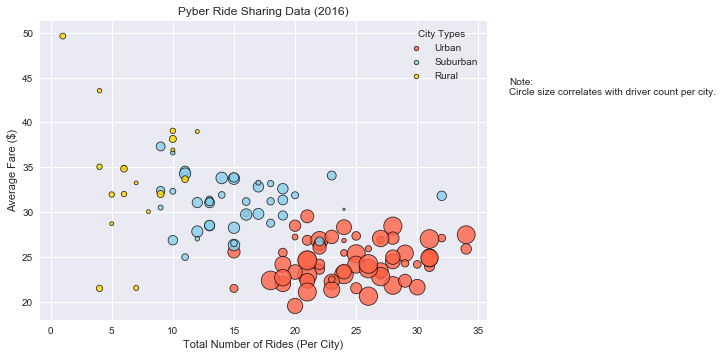

In [7]:
plt.style.use("seaborn")
plt.scatter(n_rides1, avg_fare1, s=n_drivers1*5, c="tomato", alpha=.8, lw=.8, edgecolor="k", label="Urban")
plt.scatter(n_rides2, avg_fare2, s=n_drivers2*5, c="skyblue", alpha=.8, lw=.8, edgecolor="k", label="Suburban")
plt.scatter(n_rides3, avg_fare3, s=n_drivers3*5, c="gold", alpha=.8, lw=.8, edgecolor="k", label="Rural")
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
lgnd = plt.legend(title="City Types")
for handle in lgnd.legendHandles:
    handle.set_sizes([20])
plt.text(37.5, 45, "Note:\nCircle size correlates with driver count per city.", va="top")
plt.show()

## Total Fares by City Type

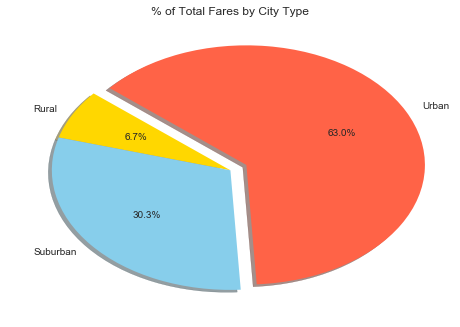

In [8]:
fare_type = df.groupby("type")["fare"].sum()
plt.pie(fare_type, explode=[0,0,0.1], labels=fare_type.index, colors=["gold", "skyblue", "tomato"], autopct="%.1f%%", 
        shadow=True, startangle=140)
plt.title("% of Total Fares by City Type")
plt.show()

## Total Rides by City Type

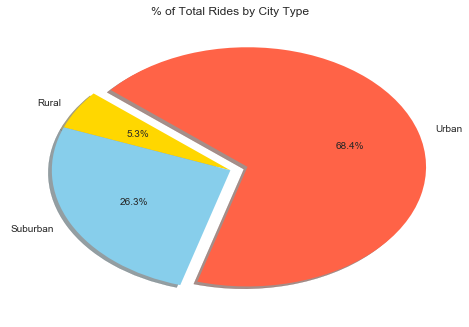

In [9]:
ride_type = df.groupby("type")["ride_id"].count()
plt.pie(ride_type, explode=[0,0,0.1], labels=ride_type.index, colors=["gold", "skyblue", "tomato"], autopct="%.1f%%", 
        shadow=True, startangle=140)
plt.title("% of Total Rides by City Type")
plt.show()

## Total Drivers by City Type

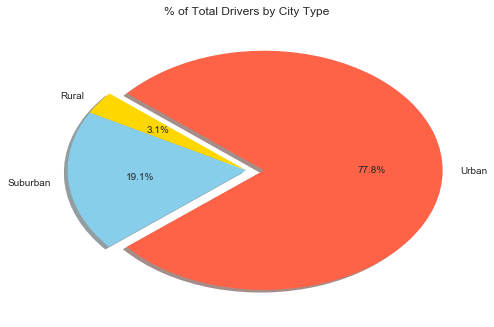

In [10]:
driver_type = city_df.groupby("type")["driver_count"].sum()
plt.pie(driver_type, explode=[0,0,0.1], labels=driver_type.index, colors=["gold", "skyblue", "tomato"], autopct="%.1f%%", 
        shadow=True, startangle=140)
plt.title("% of Total Drivers by City Type")
plt.show()